<a href="https://colab.research.google.com/github/ryu-i-engineer/ImageTaggingChallenge/blob/main/notebooks/ImageTaggingChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Tagging Challenge

## Overview : 概要

### Project target : プロジェクト目標

- 普通のECサイトにおける検索機能について､改善方法を検討する
- 画像認識によるタグ付けの開発を優先する
- メンバーも実際のプロジェクト経験をもらいつつ､デモプロジェクトの開発と記事を作成できるまで頑張る

In English:
- Consider the ways how to improve search function on e-commerce site.
- Prioritize the development of tagging by image recognition.
- The members will do our best until creating an article and developing demo project, gaining project experience.


### Study scope : 学習範囲

* Note記事を書く
* 画像認識によるタグ付けを優先して開発する
* 日本語･英語両方タグ付けできるようにする

In English:

* Write a note article
* Develop tagging system by image recognition in priority
* The system becomes able to tag  in Japanese and English


### Repository

* [TOP](https://github.com/ryu-i-engineer/ImageTaggingChallenge)
* [Projects](https://github.com/ryu-i-engineer/ImageTaggingChallenge/projects/2)
* [Sample Project](https://github.com/ryu-i-engineer/ImageTaggingChallenge/tree/main/src/app)

## Reference

- [転移学習：機械学習の次のフロンティアへの招待](https://qiita.com/icoxfog417/items/48cbf087dd22f1f8c6f4#%E8%BB%A2%E7%A7%BB%E5%AD%A6%E7%BF%92%E3%81%AE%E5%8F%96%E3%82%8A%E7%B5%84%E3%82%80%E5%95%8F%E9%A1%8C)
- [Transfer learning with TensorFlow Hub](https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub)
- [Image segmentation](https://www.tensorflow.org/tutorials/images/segmentation)
- [13_semi_supervised_learning](https://colab.research.google.com/github/machine-perception-robotics-group/MPRGDeepLearningLectureNotebook/blob/master/11_cnn_pytorch/13_semi_supervised_learning.ipynb?authuser=0#scrollTo=tPyzEOSCUTI1)
- [Semi-supervised image classification using contrastive pretraining with Sim CLR](https://keras.io/examples/vision/semisupervised_simclr/)
- [Self-training with Noisy Student improves ImageNet classification](https://arxiv.org/pdf/1911.04252.pdf)
- [Google-Research Noisy Student](https://github.com/google-research/noisystudent)
-[Qiita: Keras Noisy studentを実装してみた](https://qiita.com/rabbitcaptain/items/a15591ca49dc428223ca)


### Others
- [Vision Transformer and MLP-Mixer Architectures](https://github.com/google-research/vision_transformer)
- [Image classification with Vision Transformer](https://keras.io/examples/vision/image_classification_with_vision_transformer/)
- [ResNet - PyTorch](https://rwightman.github.io/pytorch-image-models/models/resnet/)
- [Noisy Student (EfficientNet)](https://rwightman.github.io/pytorch-image-models/models/noisy-student/)
- [Multi-label classification with PyTorch](https://github.com/aman5319/Multi-Label/blob/master/Classify_scenes.ipynb)

# Dataset structure

## Directory

<pre>
Root
│─  label.csv
│
└─images
        └─000000.jpg
        └─000001.jpg
        └─000002.jpg
        └─000003.jpg
        └─000004.jpg
        └─000005.jpg
        └─000006.jpg
        └─000007.jpg
        └─000008.jpg
        └─000009.jpg
        └─000010.jpg
</pre>

## Define lables and binarize

#### CSV format

```csv
"filename","tag1","tag2","tag3","tag4","tag5","tag6","tag7","tag8","tag9","tag10"
"1.jpg","sea","cape","clouds","sunset"
"2.jpg","mountains","trees","people"
```

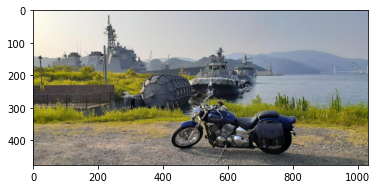

filenames bikes blue sky grasses mountains sea ships
2002  2003.jpg     1        1       1         1   1     1

In [ ]:
#@title
image = Image.open(os.path.join(train_val_root_dir, "images", df["filenames"][2002])).convert("RGB")
plt.imshow(image)
plt.show()

pd.DataFrame(df.loc[2002, df.iloc[2002]!=0]).T

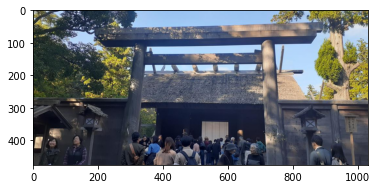

filenames blue sky people shrine torii trees
2010  2011.jpg        1      1      1     1     1

In [ ]:
#@title
image = Image.open(os.path.join(train_val_root_dir, "images", df["filenames"][2010])).convert("RGB")
plt.imshow(image)
plt.show()

pd.DataFrame(df.loc[2010, df.iloc[2010]!=0]).T

In [ ]:
#@title
N = len(df)

just_num = max(len(l) for l in df.drop(['filenames'], axis=1).columns)+1

for k, label in enumerate(df.drop(['filenames'], axis=1).columns):
    pos = sum(df[label] == 1)
    print(f"{label.ljust(just_num)}\tPos samples: {pos:<5}\tNeg samples: {N-pos:<5} \t Pos of total: {100 * pos / N:.2f}%")

bikes          	Pos samples: 30   	Neg samples: 2376  	 Pos of total: 1.25%
blue sky       	Pos samples: 853  	Neg samples: 1553  	 Pos of total: 35.45%
bridge         	Pos samples: 53   	Neg samples: 2353  	 Pos of total: 2.20%
capes          	Pos samples: 133  	Neg samples: 2273  	 Pos of total: 5.53%
cherry blossom 	Pos samples: 14   	Neg samples: 2392  	 Pos of total: 0.58%
city           	Pos samples: 40   	Neg samples: 2366  	 Pos of total: 1.66%
clouds         	Pos samples: 783  	Neg samples: 1623  	 Pos of total: 32.54%
cobblestone    	Pos samples: 50   	Neg samples: 2356  	 Pos of total: 2.08%
desert         	Pos samples: 396  	Neg samples: 2010  	 Pos of total: 16.46%
fallen leaves  	Pos samples: 101  	Neg samples: 2305  	 Pos of total: 4.20%
grasses        	Pos samples: 274  	Neg samples: 2132  	 Pos of total: 11.39%
house          	Pos samples: 15   	Neg samples: 2391  	 Pos of total: 0.62%
island         	Pos samples: 117  	Neg samples: 2289  	 Pos of total: 4.86%
lake    

# Codes

## Prepare

In [ ]:
# !tar -zxvf fasteners_dataset.tar.gz > /dev/null

In [ ]:
# # On Colab runtime
# !pip install -U albumentations==0.4.5 > /dev/null && echo
# !pip install transformers > /dev/null && echo
# !pip install pytorch-lightning > /dev/null && echo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import glob
from textwrap import wrap
import torchmetrics
import tensorboard

import albumentations as alb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import pytorch_lightning as pl
import torch.nn.functional as F

from PIL import Image
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MultiLabelBinarizer
from torch import nn
from torch.optim.optimizer import Optimizer
from torch.utils.data import DataLoader, Dataset, random_split
from tqdm import tqdm
from transformers import BeitModel, BeitFeatureExtractor
from torchvision import transforms
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from albumentations.pytorch import ToTensorV2
from torch.autograd import Variable

print(f"PyTorch Version: {torch.__version__}")
print("Num GPUs Available: ", torch.cuda.device_count())
for i in range(torch.cuda.device_count()):
    print("Device Name: ", torch.cuda.get_device_properties(i).name)

PyTorch Version: 1.10.0+cu113
Num GPUs Available:  1
Device Name:  NVIDIA GeForce GTX 1060 6GB


## Params

In [ ]:
BATCH_SIZE = 32 # 256 if torch.cuda.device_count() else 64
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
SEED = 42

np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Load dataset

In [ ]:
train_val_root_dir = './inputs/miml_dataset/'
test_root_dir = './inputs/albanycountryfasteners/test/'

In [ ]:
import pandas as pd
df = pd.read_csv(".//inputs/miml_dataset/class_label.csv")
df.dropna(axis=1, how="all")

filenames    tag1       tag2            tag3     tag4         tag5  \
0        1.jpg  desert   blue sky       mountains    rocky          NaN   
1        2.jpg  desert   blue sky          clouds      NaN          NaN   
2        3.jpg  desert  mountains        blue sky  grasses        rocky   
3        4.jpg  desert  mountains        blue sky   clouds        rocky   
4        5.jpg  desert   blue sky          clouds    rocky    mountains   
...        ...     ...        ...             ...      ...          ...   
2401  2403.jpg   torii     shrine          people   stairs  cobblestone   
2402  2404.jpg   torii     shrine          people   stairs  cobblestone   
2403  2405.jpg   torii     people           trail    trees          NaN   
2404  2406.jpg   torii   blue sky  cherry blossom    trail        trees   
2405  2407.jpg   torii   blue sky  cherry blossom    trail        trees   

           tag6   tag7 tag8 tag9  
0           NaN    NaN  NaN  NaN  
1           NaN    NaN  NaN  NaN  
2           NaN    NaN  NaN  NaN  
3           NaN    NaN  NaN  NaN  
4           NaN    NaN  NaN  NaN  
...         ...    ...  ...  ...  
2401   blue sky  trees  NaN  NaN  
2402   blue sky  trees  NaN  NaN  
2403        NaN    NaN  NaN  NaN  
2404  mountains    NaN  NaN  NaN  
2405  mountains    NaN  NaN  NaN  

[2406 rows x 10 columns]

In [ ]:
def binarize_df(label_path):
    df = pd.read_csv(label_path)
    df = df.dropna(axis=1, how="all")  # save memory and process usage
    df = df.fillna("None")  # to avoid error

    mlb = MultiLabelBinarizer()
    result = mlb.fit_transform(df.drop(columns=["filenames"]).values)  # drop not tagging cols

    bin_df = pd.DataFrame(result, columns=mlb.classes_)  # drop non-useless col.
    if 'None' in bin_df.columns:
        bin_df = bin_df.drop("None", axis=1)

    return df.drop(df.columns[1:], axis=1).join(bin_df)

In [ ]:
df = binarize_df(os.path.join(train_val_root_dir, "class_label.csv"))

In [ ]:
test_df = binarize_df(os.path.join(test_root_dir, 'label.csv'))

In [ ]:
LABELS = df.columns[1:]

In [ ]:
# prune or use at all
sample_df = df.sample(len(df))

In [ ]:
beit_feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-patch16-224-pt22k-ft22k')

In [ ]:
# pre-processing
IMAGE_SIZE = (224, 224)
train_augmentation = alb.Compose(
    [
        alb.RandomResizedCrop(width=resize, height=resize, scale=(0.5, 1.0)),
        alb.SafeRotate(),
        alb.RandomBrightnessContrast(
            brightness_limit=0.1, contrast_limit=0.2, p=0.5
        ),
        alb.ImageCompression(quality_lower=90, quality_upper=100, p=0.5),
        alb.GaussianBlur(blur_limit=(1, 3)),
        alb.CLAHE(clip_limit=6.0, tile_grid_size=(8, 8), p=1),
        alb.HorizontalFlip(),
        # alb.Normalize(mean, std),
        ToTensorV2(),
    ]
)

test_val_augmentation = alb.Compose(
    [
        alb.Resize(height=resize, width=resize),
        # alb.Normalize(mean=mean, std=std),
        ToTensorV2(),
    ]
)

In [ ]:
def covert_onehot_string_labels(label_string,label_onehot):
    labels = []
    for i, label in enumerate(label_string):
        if label_onehot[i]:
            labels.append(label)
    if len(labels) == 0:
        labels.append("NONE")
    return labels

In [ ]:
class ImgTagDataset(Dataset):
    """
    Create dataset for multi-label classification.

    Parameters
    ----------------
    df : pd.DataFrame
        Pandas DataFrame object.
        It must be contained "filename", and multi-binarized encoded columns.

    root_dir: str
        Root directory of Datasets
    """

    def __init__(self, df: pd.DataFrame, root_dir, transform):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        d = self.df.iloc[index]
        image = Image.open(
            os.path.join(self.root_dir, 'images', d["filenames"])
        ).convert("RGB")
        image = self.transform(image=np.squeeze(image))["image"]
        image = beit_feature_extractor(images=image, return_tensors="pt")['pixel_values'].squeeze(0)
        image = np.clip(image, 0, 1)
        label = torch.tensor(d[1:].tolist(), dtype=torch.float32)
        return image, label


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=SEED)

In [ ]:
train_dfs = []
val_dfs = []

train_dss = []
val_dss = []

train_dls = []
val_dls = []

for train_idx, val_idx in kf.split(df, None):
    train_dfs.append(df.iloc[train_idx])
    val_dfs.append(df.iloc[val_idx])

    train_dss.append(ImgTagDataset(train_df, train_val_root_dir, train_augmentation))
    train_dls.append(DataLoader(train_ds, batch_size=BATCH_SIZE))

    val_dss.append(ImgTagDataset(val_df, train_val_root_dir, test_val_augmentation))
    val_dls.append(DataLoader(val_ds, batch_size=BATCH_SIZE))

25 samples from the dataset


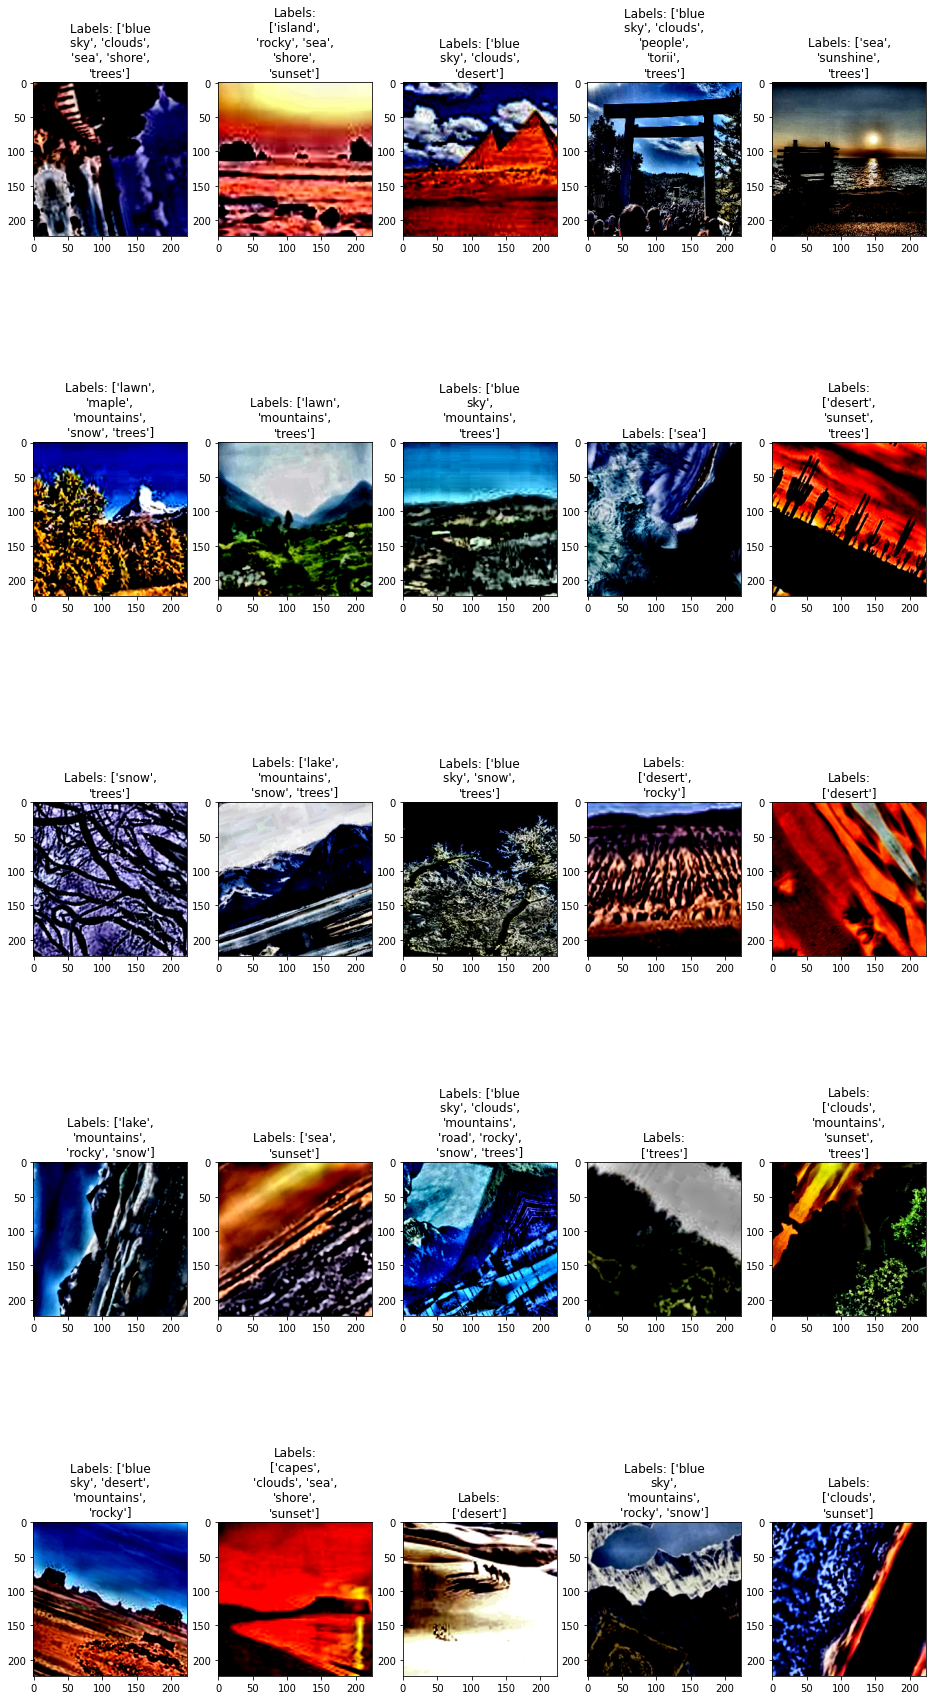

In [ ]:
from textwrap import wrap

def show_samples(ds:Dataset):
    fig=plt.figure(figsize=(16, 16))
    fig.set_figheight(32)
    columns = 5
    rows = 5
    print(columns*rows,"samples from the dataset")
    for i in range(columns*rows):
        (image, label) = train_ds[i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(np.transpose(image, (1, 2, 0)))
        plt.title('\n'.join(wrap("Labels: "+str(covert_onehot_string_labels(LABELS, label)), 16)))

    plt.show()


show_samples(val_dss[0])

## Create model

In [ ]:
class_weight = []
for k, label in enumerate(sample_df.drop(['filenames'], axis=1).columns):
    class_weight.append((sample_df[label] == 1).sum() / len(sample_df))
class_weight = torch.FloatTensor(class_weight).to(device)
class_weight

tensor([0.0125, 0.3545, 0.0220, 0.0553, 0.0058, 0.0166, 0.3254, 0.0208, 0.1646,
        0.0420, 0.1139, 0.0062, 0.0486, 0.0357, 0.0520, 0.0158, 0.0370, 0.0145,
        0.2984, 0.0179, 0.0852, 0.0141, 0.0200, 0.1978, 0.3279, 0.0245, 0.0586,
        0.0191, 0.1355, 0.0133, 0.2303, 0.0145, 0.0349, 0.0158, 0.0291, 0.3948],
       device='cuda:0')

In [ ]:
# calculate pos weight
pos_weight = []

for k, label in enumerate(sample_df.drop(["filenames"], axis=1).columns):
    pos_weight.append((sample_df[label] == 1).sum())

max_count = max(pos_weight)

for i in range(len(pos_weight)):
    if pos_weight[i] == 0:
        continue

    pos_weight[i] = max_count / pos_weight[i]

pos_weight = torch.FloatTensor(pos_weight).to(device)
pos_weight = F.softmax(pos_weight*1e-2, dim=0)*1e+2
pos_weight

tensor([3.2096, 2.3646, 2.7975, 2.5115, 4.6091, 2.9653, 2.3669, 2.8277, 2.3952,
        2.5690, 2.4209, 4.4053, 2.5362, 2.6115, 2.5230, 3.0026, 2.6018, 3.0676,
        2.3695, 2.9165, 2.4493, 3.0922, 2.8502, 2.3855, 2.3667, 2.7469, 2.5014,
        2.8748, 2.4075, 3.1467, 2.3788, 3.0676, 2.6184, 3.0026, 2.6783, 2.3619],
       device='cuda:0')

In [ ]:
class BeiTNet(nn.Module):
    def __init__(self, pretrained_beit_model, class_num):
        super(BeiTNet, self).__init__()
        self.beit = pretrained_beit_model
        self.fc = nn.Sequential(
            nn.LayerNorm(768, eps=1e-12),
            nn.Linear(768, 768),
            nn.Dropout(0.1),
            nn.LayerNorm(768, eps=1e-12),
            nn.GELU(),
            nn.Linear(768, class_num)
        )

        # まず全パラメータを勾配計算Falseにする
        for param in self.parameters():
            param.requires_grad = False

        for param in self.beit.encoder.layer[-1].parameters():
            param.requires_grad = True

        # 追加したクラス分類用の全結合層を勾配計算ありに変更
        for param in self.fc.parameters():
            param.requires_grad = True

    def _get_cls_vec(self, states):
        return states['last_hidden_state'][:, 0, :]

    def forward(self, img):
        output = self.beit(img)
        output = self._get_cls_vec(output)
        output = self.fc(output)
        return output.squeeze(0)

In [ ]:
class ImgTagLitModule(pl.LightningModule):
    def __init__(self, net, class_num, lr=5e-4, pos_weight=None):
        super().__init__()
        # self.save_hyperparameters()

        self.lr = lr
        self.class_num = class_num
        self.pos_weight = pos_weight
        self.net = BeiTNet(net, class_num)
        self.forward = self.net.forward

    def training_step(self, batch, batch_idx):
        img, labels = batch
        outputs = self.forward(img)

        loss = 0
        if labels is not None:
            loss = nn.functional.binary_cross_entropy_with_logits(outputs, labels, pos_weight=self.pos_weight)

        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        img, labels = batch
        outputs = self.forward(img)

        loss = 0
        if labels is not None:
            loss = nn.functional.binary_cross_entropy_with_logits(outputs, labels, pos_weight=self.pos_weight)

        self.log("val_loss", loss)
        return loss

    def test_step(self, batch, batch_idx):
        img, labels = batch
        outputs = self.forward(img)

        loss = 0
        if labels is not None:
            loss = nn.functional.binary_cross_entropy_with_logits(outputs, labels)

        self.log("test_loss", loss)
        return loss

    def configure_optimizers(self):
        optimizer = optim.Adam([
            {'params': self.net.beit.encoder.layer[-1].parameters(), 'lr': 1e-8},
            {'params': self.net.fc.parameters(), 'lr': self.lr}
        ])

        return optimizer


## Train model

In [ ]:
beit_model = BeitModel.from_pretrained('microsoft/beit-base-patch16-224-pt22k-ft22k')

C:\Users\Lisa-Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of the model checkpoint at microsoft/beit-base-patch16-224-pt22k-ft22k were not used when initializing BeitModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BeitModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BeitModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Train the model
early_stop_callback = EarlyStopping(
    monitor='train_loss', min_delta=0.01, patience=7, mode='min')

checkpoint_callback = ModelCheckpoint(dirpath='./models/tmp/kfold'+str(i),
    filename='{epoch}', monitor='val_loss', mode='min', verbose=True)

# Initialize a trainer
trainer = pl.Trainer(
    gpus=torch.cuda.device_count(),
    max_epochs=100,
    callbacks=[checkpoint_callback, early_stop_callback],
    log_every_n_steps=1,
    # fast_dev_run=True,
    )

module  = ImgTagLitModule(beit_model, len(LABELS), lr=2e-3, pos_weight=pos_weight)
trainer.fit(module, train_dls[0], val_dls[0])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type    | Params
---------------------------------
0 | net  | BeiTNet | 86.4 M
---------------------------------
7.7 M     Trainable params
78.7 M    Non-trainable params
86.4 M    Total params
345.533   Total estimated model params size (MB)
C:\Users\Lisa-Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:617: UserWarning: Checkpoint directory D:\git\ImageTaggingChallenge\models\tmp\kfold4 exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

C:\Users\Lisa-Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\trainer\data_loading.py:110: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\Lisa-Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\trainer\data_loading.py:110: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch 0, global step 50: val_loss reached 0.42748 (best 0.42748), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=0.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 1, global step 101: val_loss reached 0.35566 (best 0.35566), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 2, global step 152: val_loss reached 0.29025 (best 0.29025), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=2.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 3, global step 203: val_loss reached 0.27172 (best 0.27172), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=3.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 4, global step 254: val_loss reached 0.25095 (best 0.25095), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=4.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 5, global step 305: val_loss reached 0.24020 (best 0.24020), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=5.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 6, global step 356: val_loss reached 0.23296 (best 0.23296), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=6.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 7, global step 407: val_loss reached 0.23038 (best 0.23038), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=7.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 8, global step 458: val_loss reached 0.22282 (best 0.22282), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=8.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 9, global step 509: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 10, global step 560: val_loss reached 0.22221 (best 0.22221), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=10.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 11, global step 611: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 12, global step 662: val_loss reached 0.22169 (best 0.22169), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=12.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 13, global step 713: val_loss reached 0.21723 (best 0.21723), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=13.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 14, global step 764: val_loss reached 0.21380 (best 0.21380), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=14.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 15, global step 815: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 16, global step 866: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 17, global step 917: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 18, global step 968: val_loss reached 0.21217 (best 0.21217), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=18-v1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 19, global step 1019: val_loss reached 0.20835 (best 0.20835), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=19.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 20, global step 1070: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 21, global step 1121: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 22, global step 1172: val_loss reached 0.20800 (best 0.20800), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=22-v1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 23, global step 1223: val_loss reached 0.20152 (best 0.20152), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=23-v1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 24, global step 1274: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 25, global step 1325: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 26, global step 1376: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 27, global step 1427: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 28, global step 1478: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 29, global step 1529: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 30, global step 1580: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 31, global step 1631: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 32, global step 1682: val_loss reached 0.20131 (best 0.20131), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=32.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 33, global step 1733: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 34, global step 1784: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 35, global step 1835: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 36, global step 1886: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 37, global step 1937: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 38, global step 1988: val_loss was not in top 1


In [ ]:
# Train the model
losses = []

for i in range(5):
    early_stop_callback = EarlyStopping(
        monitor='train_loss', min_delta=0.01, patience=7, mode='min')

    checkpoint_callback = ModelCheckpoint(dirpath='./models/tmp/kfold'+str(i),
        filename='{epoch}', monitor='val_loss', mode='min', verbose=True)

    # Initialize a trainer
    trainer = pl.Trainer(
        gpus=torch.cuda.device_count(),
        max_epochs=100,
        callbacks=[checkpoint_callback, early_stop_callback],
        log_every_n_steps=1,
        # fast_dev_run=True,
        )

    module  = ImgTagLitModule(beit_model, len(LABELS), lr=2e-3, pos_weight=pos_weight)
    trainer.fit(module, train_dls[i], val_dls[i])
    
    losses.append(trainer.logged_metrics["val_loss"])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type    | Params
---------------------------------
0 | net  | BeiTNet | 86.4 M
---------------------------------
7.7 M     Trainable params
78.7 M    Non-trainable params
86.4 M    Total params
345.533   Total estimated model params size (MB)
C:\Users\Lisa-Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:617: UserWarning: Checkpoint directory D:\git\ImageTaggingChallenge\models\tmp\kfold0 exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch 0, global step 50: val_loss reached 0.42531 (best 0.42531), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=0-v1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 1, global step 101: val_loss reached 0.35609 (best 0.35609), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 2, global step 152: val_loss reached 0.29852 (best 0.29852), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=2.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 3, global step 203: val_loss reached 0.26640 (best 0.26640), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=3.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 4, global step 254: val_loss reached 0.25731 (best 0.25731), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=4.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 5, global step 305: val_loss reached 0.24912 (best 0.24912), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=5.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 6, global step 356: val_loss reached 0.23371 (best 0.23371), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=6.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 7, global step 407: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 8, global step 458: val_loss reached 0.22971 (best 0.22971), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=8.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 9, global step 509: val_loss reached 0.22870 (best 0.22870), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=9.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 10, global step 560: val_loss reached 0.22171 (best 0.22171), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=10.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 11, global step 611: val_loss reached 0.21998 (best 0.21998), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=11.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 12, global step 662: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 13, global step 713: val_loss reached 0.21319 (best 0.21319), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=13.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 14, global step 764: val_loss reached 0.20929 (best 0.20929), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=14.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 15, global step 815: val_loss reached 0.20690 (best 0.20690), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=15-v1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 16, global step 866: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 17, global step 917: val_loss reached 0.20668 (best 0.20668), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=17.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 18, global step 968: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 19, global step 1019: val_loss reached 0.20349 (best 0.20349), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=19-v1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 20, global step 1070: val_loss reached 0.20095 (best 0.20095), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold0\epoch=20.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 21, global step 1121: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 22, global step 1172: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 23, global step 1223: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 24, global step 1274: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 25, global step 1325: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 26, global step 1376: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 27, global step 1427: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 28, global step 1478: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 29, global step 1529: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 30, global step 1580: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 31, global step 1631: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 32, global step 1682: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 33, global step 1733: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 34, global step 1784: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 35, global step 1835: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 36, global step 1886: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 37, global step 1937: val_loss was not in top 1
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type    | Params
---------------------------------
0 | net  | BeiTNet | 86.4 M
---------------------------------
7.7 M     Trainable params
78.7 M    Non-trainable params
86.4 M    Total params
345.533   Total estimated model params size (MB)
C:\Users\Lisa-Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:617: UserWarning: Checkpoint directory D:\git\ImageTaggingChallenge\models\tmp\kfold1 exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch 0, global step 50: val_loss reached 0.42581 (best 0.42581), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold1\epoch=0-v1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 1, global step 101: val_loss reached 0.34825 (best 0.34825), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold1\epoch=1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 2, global step 152: val_loss reached 0.29094 (best 0.29094), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold1\epoch=2.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 3, global step 203: val_loss reached 0.26560 (best 0.26560), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold1\epoch=3.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 4, global step 254: val_loss reached 0.24724 (best 0.24724), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold1\epoch=4.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 5, global step 305: val_loss reached 0.24020 (best 0.24020), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold1\epoch=5.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 6, global step 356: val_loss reached 0.23317 (best 0.23317), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold1\epoch=6.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 7, global step 407: val_loss reached 0.22908 (best 0.22908), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold1\epoch=7.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 8, global step 458: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 9, global step 509: val_loss reached 0.22885 (best 0.22885), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold1\epoch=9.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 10, global step 560: val_loss reached 0.22054 (best 0.22054), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold1\epoch=10.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 11, global step 611: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 12, global step 662: val_loss reached 0.21648 (best 0.21648), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold1\epoch=12.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 13, global step 713: val_loss reached 0.21339 (best 0.21339), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold1\epoch=13.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 14, global step 764: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 15, global step 815: val_loss reached 0.21230 (best 0.21230), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold1\epoch=15.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 16, global step 866: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 17, global step 917: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 18, global step 968: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 19, global step 1019: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 20, global step 1070: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 21, global step 1121: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 22, global step 1172: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 23, global step 1223: val_loss reached 0.20945 (best 0.20945), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold1\epoch=23.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 24, global step 1274: val_loss reached 0.20360 (best 0.20360), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold1\epoch=24-v1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 25, global step 1325: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 26, global step 1376: val_loss was not in top 1
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type    | Params
---------------------------------
0 | net  | BeiTNet | 86.4 M
---------------------------------
7.7 M     Trainable params
78.7 M    Non-trainable params
86.4 M    Total params
345.533   Total estimated model params size (MB)
C:\Users\Lisa-Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:617: UserWarning: Checkpoint directory D:\git\ImageTaggingChallenge\models\tmp\kfold2 exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch 0, global step 50: val_loss reached 0.42572 (best 0.42572), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=0.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 1, global step 101: val_loss reached 0.34547 (best 0.34547), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 2, global step 152: val_loss reached 0.28720 (best 0.28720), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=2.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 3, global step 203: val_loss reached 0.27389 (best 0.27389), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=3.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 4, global step 254: val_loss reached 0.25183 (best 0.25183), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=4.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 5, global step 305: val_loss reached 0.25093 (best 0.25093), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=5.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 6, global step 356: val_loss reached 0.23246 (best 0.23246), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=6.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 7, global step 407: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 8, global step 458: val_loss reached 0.22954 (best 0.22954), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=8.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 9, global step 509: val_loss reached 0.22758 (best 0.22758), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=9.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 10, global step 560: val_loss reached 0.22536 (best 0.22536), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=10.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 11, global step 611: val_loss reached 0.22334 (best 0.22334), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=11.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 12, global step 662: val_loss reached 0.22197 (best 0.22197), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=12.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 13, global step 713: val_loss reached 0.21817 (best 0.21817), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=13.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 14, global step 764: val_loss reached 0.21183 (best 0.21183), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=14.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 15, global step 815: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 16, global step 866: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 17, global step 917: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 18, global step 968: val_loss reached 0.20651 (best 0.20651), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=18.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 19, global step 1019: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 20, global step 1070: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 21, global step 1121: val_loss reached 0.20162 (best 0.20162), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold2\epoch=21.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 22, global step 1172: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 23, global step 1223: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 24, global step 1274: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 25, global step 1325: val_loss was not in top 1
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type    | Params
---------------------------------
0 | net  | BeiTNet | 86.4 M
---------------------------------
7.7 M     Trainable params
78.7 M    Non-trainable params
86.4 M    Total params
345.533   Total estimated model params size (MB)
C:\Users\Lisa-Windows\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:617: UserWarning: Checkpoint directory D:\git\ImageTaggingChallenge\models\tmp\kfold3 exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch 0, global step 50: val_loss reached 0.42741 (best 0.42741), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold3\epoch=0.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 1, global step 101: val_loss reached 0.35467 (best 0.35467), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold3\epoch=1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 2, global step 152: val_loss reached 0.30660 (best 0.30660), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold3\epoch=2.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 3, global step 203: val_loss reached 0.26122 (best 0.26122), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold3\epoch=3.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 4, global step 254: val_loss reached 0.24701 (best 0.24701), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold3\epoch=4.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 5, global step 305: val_loss reached 0.23700 (best 0.23700), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold3\epoch=5.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 6, global step 356: val_loss reached 0.23249 (best 0.23249), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold3\epoch=6.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 7, global step 407: val_loss reached 0.23177 (best 0.23177), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold3\epoch=7.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 8, global step 458: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 9, global step 509: val_loss reached 0.22466 (best 0.22466), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold3\epoch=9.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 10, global step 560: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 11, global step 611: val_loss reached 0.22255 (best 0.22255), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold3\epoch=11.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 12, global step 662: val_loss reached 0.21491 (best 0.21491), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold3\epoch=12.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 13, global step 713: val_loss reached 0.21378 (best 0.21378), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold3\epoch=13.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 14, global step 764: val_loss reached 0.21168 (best 0.21168), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold3\epoch=14.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 15, global step 815: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 16, global step 866: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 17, global step 917: val_loss reached 0.21023 (best 0.21023), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold3\epoch=17.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 18, global step 968: val_loss reached 0.20354 (best 0.20354), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold3\epoch=18.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 19, global step 1019: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 20, global step 1070: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 21, global step 1121: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 22, global step 1172: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 23, global step 1223: val_loss was not in top 1
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type    | Params
---------------------------------
0 | net  | BeiTNet | 86.4 M
---------------------------------
7.7 M     Trainable params
78.7 M    Non-trainable params
86.4 M    Total params
345.533   Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Epoch 0, global step 50: val_loss reached 0.42588 (best 0.42588), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=0.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 1, global step 101: val_loss reached 0.35775 (best 0.35775), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=1.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 2, global step 152: val_loss reached 0.29619 (best 0.29619), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=2.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 3, global step 203: val_loss reached 0.26746 (best 0.26746), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=3.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 4, global step 254: val_loss reached 0.25135 (best 0.25135), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=4.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 5, global step 305: val_loss reached 0.23699 (best 0.23699), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=5.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 6, global step 356: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 7, global step 407: val_loss reached 0.22935 (best 0.22935), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=7.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 8, global step 458: val_loss reached 0.22759 (best 0.22759), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=8.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 9, global step 509: val_loss reached 0.22499 (best 0.22499), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=9.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 10, global step 560: val_loss reached 0.22111 (best 0.22111), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=10.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 11, global step 611: val_loss reached 0.21958 (best 0.21958), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=11.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 12, global step 662: val_loss reached 0.21486 (best 0.21486), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=12.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 13, global step 713: val_loss reached 0.21388 (best 0.21388), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=13.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 14, global step 764: val_loss reached 0.21292 (best 0.21292), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=14.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 15, global step 815: val_loss reached 0.21193 (best 0.21193), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=15.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 16, global step 866: val_loss reached 0.20780 (best 0.20780), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=16.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 17, global step 917: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 18, global step 968: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 19, global step 1019: val_loss reached 0.20689 (best 0.20689), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=19.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 20, global step 1070: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 21, global step 1121: val_loss reached 0.20627 (best 0.20627), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=21.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 22, global step 1172: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 23, global step 1223: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 24, global step 1274: val_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 25, global step 1325: val_loss reached 0.20595 (best 0.20595), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=25.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 26, global step 1376: val_loss reached 0.20480 (best 0.20480), saving model to "D:\git\ImageTaggingChallenge\models\tmp\kfold4\epoch=26-v2.ckpt" as top 1


In [ ]:
losses

[0.20722484588623047,
 0.20755179226398468,
 0.20759835839271545,
 0.20773227512836456,
 0.2048015594482422]

In [ ]:
np.round(np.mean(losses), 3)

0.207

## Save model

In [ ]:
from datetime import date
import time

export_path = f"./models/{date.today().isoformat()}_{str(int(time.time()))}"
if os.path.exists(export_path) is False:
    os.mkdir(export_path)
torch.save(module.net.state_dict(), os.path.join(export_path, "beit_model.pt"))

## Load model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = BeiTNet(beit_model, len(LABELS)).to(device)

net.load_state_dict(torch.load(os.path.join(export_path, "beit_model.pt")))
net.eval()

BeiTNet(
  (beit): BeitModel(
    (embeddings): BeitEmbeddings(
      (patch_embeddings): PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BeitEncoder(
      (layer): ModuleList(
        (0): BeitLayer(
          (attention): BeitAttention(
            (attention): BeitSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (relative_position_bias): BeitRelativePositionBias()
            )
            (output): BeitSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): BeitInterme

## Evaluate

In [ ]:
# Start tensorboard.
%reload_ext tensorboard
%tensorboard --logdir ./lightning_logs/

# Open -> http://127.0.0.1:6006/#scalars

9 samples from the dataset


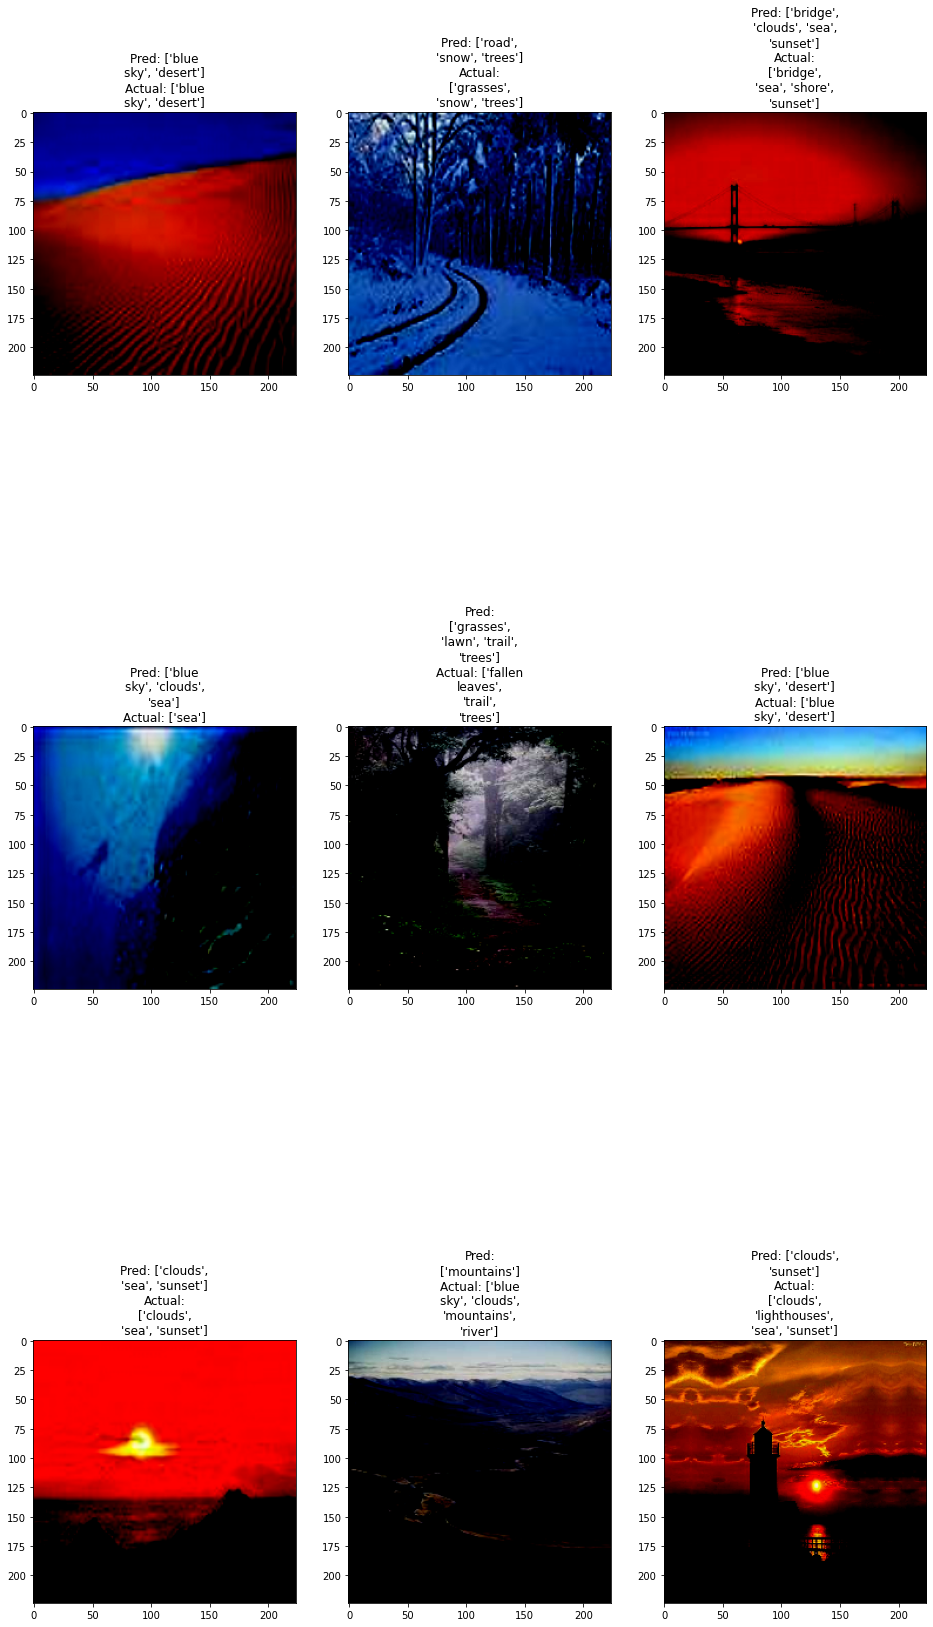

In [ ]:
def show_samples(data_module):
    fig=plt.figure(figsize=(16, 16))
    fig.set_figheight(32)
    columns = 3
    rows = 3
    i, (image, label) = next(enumerate(data_module.val_dataloader()))
    net.eval()
    label = label.to(device)
    image2 = image.to(device)
    preds = net(image2)
    print(columns*rows,"samples from the dataset")
    for i in range(columns*rows):
        fig.add_subplot(rows, columns, i+1)
        pred = preds[i]
        pred[pred>0.5]=1
        pred[pred<=0.5]=0
        plt.imshow(np.clip(image[i].numpy().transpose([1, 2, 0]), 0, 1))

        plt.title('\n'.join(wrap("Pred: "+ str(covert_onehot_string_labels(LABELS, pred)), 16)) + "\n" + '\n'.join(wrap("Actual: "+str(covert_onehot_string_labels(LABELS, label[i])), 16)))

    plt.show()

show_samples(data_module)

# Test

In [ ]:
test_data_dir = "./inputs/albanycountryfasteners/test/images"
test_data_dir = "./inputs/test2/"
# test_data_dir = "./inputs/Camera/"
test_filenames = glob.glob(os.path.join(test_data_dir, "*.jpg"))

25 samples from the dataset


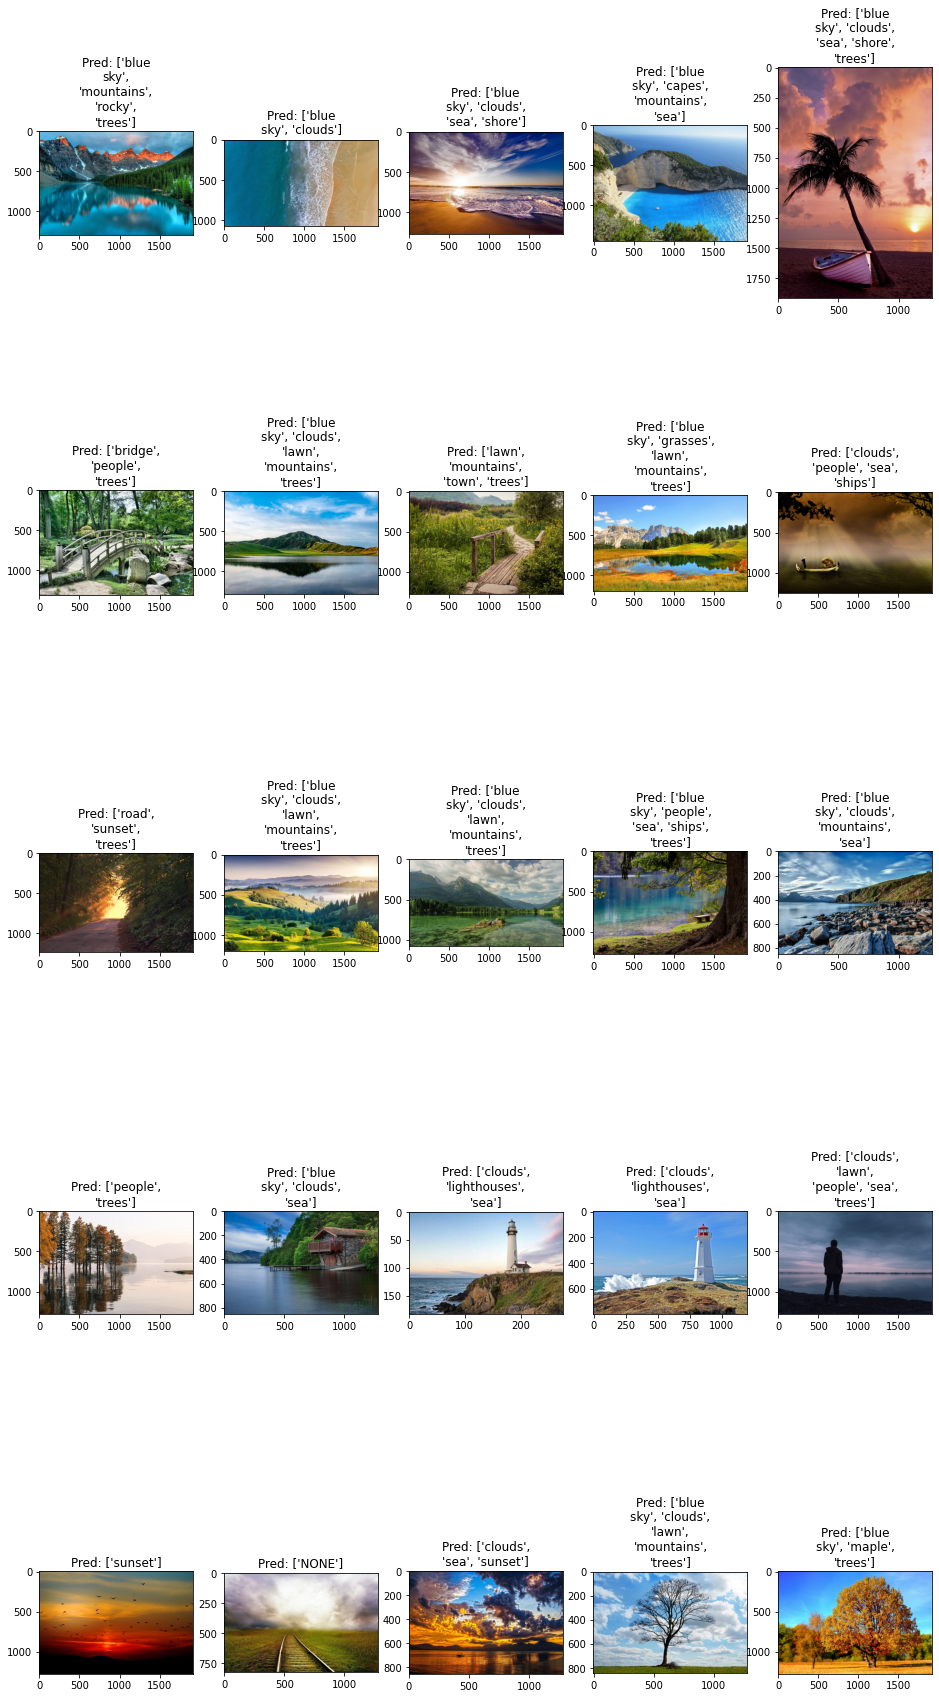

In [ ]:
# Using 200 images of 2000.
import random
def show_samples(test_filenames):
    fig=plt.figure(figsize=(16, 16))
    fig.set_figheight(32)
    columns = 5
    rows = 5
    # net.eval()

    print(columns*rows,"samples from the dataset")
    for i in range(len(test_filenames[:columns*rows])):
        selected_index = random.randint(0, len(test_filenames)-1)
        fig.add_subplot(rows, columns, i+1)
        image = Image.open(test_filenames[i]).convert("RGB")
        image_transformed = beit_feature_extractor(np.squeeze(image), return_tensors='pt')['pixel_values']
        # image2 = testl_augmentation(image=np.squeeze(image))["image"]
        # image_transformed = np.clip(image_transformed, 0, 1)
        
        image_transformed = image_transformed.expand([1, 3, 224, 224])
        preds = image_transformed.cuda()
        preds = module.net(preds)
        preds[preds>0.5]=1
        preds[preds<=0.5]=0
        plt.imshow(image)

        plt.title('\n'.join(wrap("Pred: "+ str(covert_onehot_string_labels(LABELS, preds)), 16)))

    plt.show()

module.net.to(device)
show_samples(test_filenames)

25 samples from the dataset


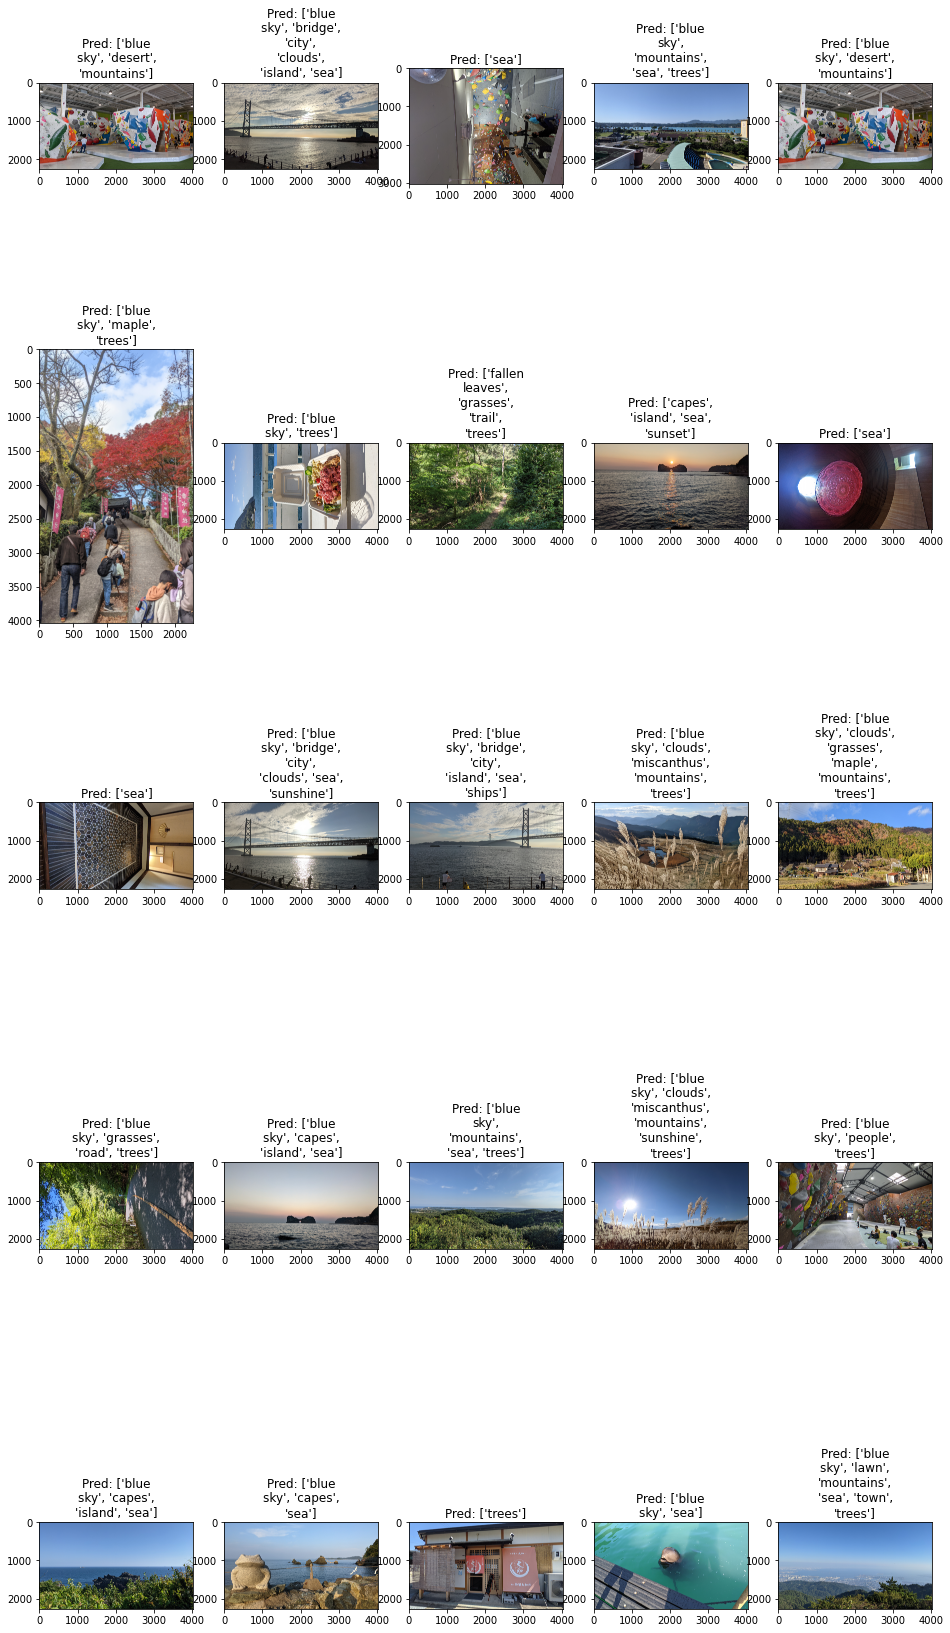

In [ ]:
import random
def show_samples(test_filenames):
    fig=plt.figure(figsize=(16, 16))
    fig.set_figheight(32)
    columns = 5
    rows = 5
    net.eval()

    print(columns*rows,"samples from the dataset")
    for i in range(len(test_filenames[:columns*rows])):
        selected_index = random.randint(0, len(test_filenames)-1)
        fig.add_subplot(rows, columns, i+1)
        image = Image.open(test_filenames[selected_index]).convert("RGB")
        image_transformed = beit_feature_extractor(np.squeeze(image), return_tensors='pt')['pixel_values']
        # image2 = testl_augmentation(image=np.squeeze(image))["image"]
        # image_transformed = np.clip(image_transformed, 0, 1)
        
        image_transformed = image_transformed.expand([1, 3, 224, 224])
        preds = image_transformed.cuda()
        preds = net(preds)
        preds[preds>0.5]=1
        preds[preds<=0.5]=0
        plt.imshow(image)

        plt.title('\n'.join(wrap("Pred: "+ str(covert_onehot_string_labels(LABELS, preds)), 16)))

    plt.show()


show_samples(test_filenames)